# Multilayer perceptron in TensorFlow (using Keras)

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import cPickle as pickle
import gzip
import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras

with gzip.open('../../lasagne/mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read

# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

((4000, 1, 28, 28), (4000,), 28)


Using TensorFlow backend.


(4000, 784)

In [2]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [3]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [4]:
lambd = 0.000005
from keras.regularizers import l2, activity_l2
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784),activity_regularizer=activity_l2(lambd)))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(50,activity_regularizer=activity_l2(lambd)))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax',activity_regularizer=activity_l2(lambd)))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [5]:
#tensorboard = keras.callbacks.TensorBoard(log_dir='/tmp/dumm/run4', write_graph=True)
history = model.fit(X[0:2400], 
          convertToOneHot(y[0:2400],10), 
          nb_epoch=50, 
          batch_size=128, 
          #callbacks=[tensorboard],
          validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)])

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2400/2400 [==============================] - 0s - loss: 2.1494 - acc: 0.3933 - val_loss: 1.2867 - val_acc: 0.7917
Epoch 2/50
2400/2400 [==============================] - 0s - loss: 1.2997 - acc: 0.7133 - val_loss: 0.9447 - val_acc: 0.8333
Epoch 3/50
2400/2400 [==============================] - 0s - loss: 1.0261 - acc: 0.7975 - val_loss: 0.8312 - val_acc: 0.8567
Epoch 4/50
2400/2400 [==============================] - 0s - loss: 0.8982 - acc: 0.8429 - val_loss: 0.7674 - val_acc: 0.8767
Epoch 5/50
2400/2400 [==============================] - 0s - loss: 0.8015 - acc: 0.8642 - val_loss: 0.7278 - val_acc: 0.8933
Epoch 6/50
2400/2400 [==============================] - 0s - loss: 0.7231 - acc: 0.8908 - val_loss: 0.7060 - val_acc: 0.8917
Epoch 7/50
2400/2400 [==============================] - 0s - loss: 0.6833 - acc: 0.8938 - val_loss: 0.6903 - val_acc: 0.9067
Epoch 8/50
2400/2400 [==============================] - 0s - loss: 0.6491 - ac

(0, 1.1)

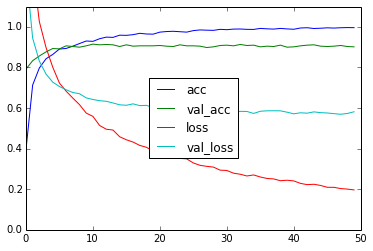

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['acc', 'val_acc', 'loss', 'val_loss'],loc=10)
plt.ylim((0,1.1))